# Forecasting Sentiments: Deep Learning for Future Tweet Analysis

project done by deep learning models-LSTM and RNN by mauzum shamil


# importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import keras 
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Flatten,SpatialDropout1D,Embedding,LSTM,Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import os
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# importing multiple datasets

In [3]:
import pandas as pd
import glob

# Get a list of file paths for all CSV files in the directory
file_paths = glob.glob(r'C:\Users\dell\Desktop\FUTURE TWEET TEXT ANALYSIS\*.csv')

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file path and read the CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into one DataFrame
concatenated_df = pd.concat(dfs, ignore_index=True)  # Set ignore_index=True to reset index after concatenation

# Display the concatenated DataFrame
concatenated_df.head()  # Display the first few rows of the concatenated DataFrame


,Unnamed: 0,0,1,2,3
0,0,@AndiKaraboutis,2023-02-06 20:57:28+00:00,https://twitter.com/AndiKaraboutis/status/1622...,The coasts and a tad of Midwest still goi g st...
1,1,@AndiKaraboutis,2022-12-27 19:17:57+00:00,https://twitter.com/AndiKaraboutis/status/1607...,@nyike @rwang0 @jayferro @itlinchpin @mcdavis1...
2,2,@AndiKaraboutis,2022-09-13 23:01:09+00:00,https://twitter.com/AndiKaraboutis/status/1569...,RIP ma’am… https://t.co/Qf1zU5tD6h
3,3,@AndiKaraboutis,2022-09-06 21:32:22+00:00,https://twitter.com/AndiKaraboutis/status/1567...,Thrilled to be appointed to the board of such ...
4,4,@AndiKaraboutis,2022-06-20 20:15:14+00:00,https://twitter.com/AndiKaraboutis/status/1538...,The future is Digital.


# data preprocessing

In [4]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2569 non-null   int64 
 1   0           2569 non-null   object
 2   1           2569 non-null   object
 3   2           2569 non-null   object
 4   3           2569 non-null   object
dtypes: int64(1), object(4)
memory usage: 100.5+ KB


In [5]:
concatenated_df.tail()

,Unnamed: 0,0,1,2,3
2564,120,@JeffBezos,2021-10-02 22:39:18+00:00,https://twitter.com/JeffBezos/status/144443182...,.@ReedHastings and Ted Sarandos and the team a...
2565,121,@JeffBezos,2021-10-01 13:02:13+00:00,https://twitter.com/JeffBezos/status/144392421...,(2/2) The two articles are only 8 months apart...
2566,122,@JeffBezos,2021-10-01 13:02:13+00:00,https://twitter.com/JeffBezos/status/144392421...,After many failures and setbacks in gaming we ...
2567,123,@JeffBezos,2021-09-20 22:47:01+00:00,https://twitter.com/JeffBezos/status/144008511...,Good exchange of ideas on climate change with ...
2568,124,@JeffBezos,2021-09-16 16:08:08+00:00,https://twitter.com/JeffBezos/status/143853518...,Congratulations to @ElonMusk and the @SpaceX t...


In [6]:
df1 = pd.read_csv(r"C:\Users\dell\Desktop\elonmusk.csv")

In [7]:
df = pd.concat([concatenated_df,df1],axis=0)

In [8]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3'], dtype='object')

In [9]:
df = df.drop(['Unnamed: 0', '0', '1', '2'],axis=1)

In [10]:
df

,3
0,The coasts and a tad of Midwest still goi g st...
1,@nyike @rwang0 @jayferro @itlinchpin @mcdavis1...
2,RIP ma’am… https://t.co/Qf1zU5tD6h
3,Thrilled to be appointed to the board of such ...
4,The future is Digital.
...,...
8957,@flcnhvy Tesla is responsible for 2/3 of all t...
8958,So proud of the Tesla team for achieving this ...
8959,"@newscientist Um, we have giant fusion reactor..."
8960,@comma_ai Tesla Full Self-Driving will work at...


In [11]:
df.rename(columns={'3':'Text'},inplace=True)

In [12]:
df

,Text
0,The coasts and a tad of Midwest still goi g st...
1,@nyike @rwang0 @jayferro @itlinchpin @mcdavis1...
2,RIP ma’am… https://t.co/Qf1zU5tD6h
3,Thrilled to be appointed to the board of such ...
4,The future is Digital.
...,...
8957,@flcnhvy Tesla is responsible for 2/3 of all t...
8958,So proud of the Tesla team for achieving this ...
8959,"@newscientist Um, we have giant fusion reactor..."
8960,@comma_ai Tesla Full Self-Driving will work at...


In [13]:
df.isna().sum()


Text    0
dtype: int64

In [14]:
df.describe

<bound method NDFrame.describe of                                                    Text
0     The coasts and a tad of Midwest still goi g st...
1     @nyike @rwang0 @jayferro @itlinchpin @mcdavis1...
2                    RIP ma’am… https://t.co/Qf1zU5tD6h
3     Thrilled to be appointed to the board of such ...
4                                The future is Digital.
...                                                 ...
8957  @flcnhvy Tesla is responsible for 2/3 of all t...
8958  So proud of the Tesla team for achieving this ...
8959  @newscientist Um, we have giant fusion reactor...
8960  @comma_ai Tesla Full Self-Driving will work at...
8961  @PPathole Dojo isn’t needed, but will make sel...

[11531 rows x 1 columns]>

In [15]:
df.describe()

,Text
count,11531
unique,11268
top,@BillyM2k 🤣
freq,27


In [16]:
# cleaning the dataset

In [17]:
def clean(text):
    text=text.lower()
    text=re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[-()\"#/@;:<>~|.?,!]","",text)
    text = re.sub('\n', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    words = [w for w in tokens if not w in stop_words]
    return " ".join(words)

In [18]:
df['Text'] = df['Text'].apply(clean)

In [19]:
df

,Text
0,coasts tad midwest still goi g strong tech sea...
1,nyike rwang jayferro itlinchpin mcdavis myless...
2,rip https co qf zu td h
3,thrilled appointed board respected global prof...
4,future digital
...,...
8957,flcnhvy tesla responsible personal amp profess...
8958,proud tesla team achieving major milestone sta...
8959,newscientist um giant fusion reactor sky works...
8960,comma ai tesla full self driving work safety l...


# CREATING CLASS COLUMN DEFINING THE SENTIMENT

In [20]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [21]:
from textblob import TextBlob
import pandas as pd

# Assuming 'tweets' is your DataFrame containing the tweets
def analyze_sentiment(df):
    analysis = TextBlob(df)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each tweet
df['class'] = df['Text'].apply(analyze_sentiment)



In [22]:
df

,Text,class
0,coasts tad midwest still goi g strong tech sea...,positive
1,nyike rwang jayferro itlinchpin mcdavis myless...,neutral
2,rip https co qf zu td h,neutral
3,thrilled appointed board respected global prof...,positive
4,future digital,neutral
...,...,...
8957,flcnhvy tesla responsible personal amp profess...,positive
8958,proud tesla team achieving major milestone sta...,positive
8959,newscientist um giant fusion reactor sky works...,neutral
8960,comma ai tesla full self driving work safety l...,positive


In [23]:
df[1000:1010]

,Text,class
1000,realsharonzhou congratulations realsharonzhou,neutral
1001,mitsloan thanks saramariebrown mitsloan writin...,positive
1002,tiangolo thank tiangolo fan fastapi work years...,positive
1003,new machine learning specialization deeplearni...,positive
1004,kira learning building go solution k educators...,positive
1005,rising interest rates affect ai projects deliv...,positive
1006,read surprising origins many machine learning ...,positive
1007,call arm teachers following texas school shoot...,negative
1008,speaking someone worked anti spam determined a...,positive
1009,people asked coursera share birthday yes april th,neutral


In [24]:
df.nunique()

Text     11019
class        3
dtype: int64

(array([5326.,    0.,    0.,    0.,    0., 5041.,    0.,    0.,    0.,
        1164.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

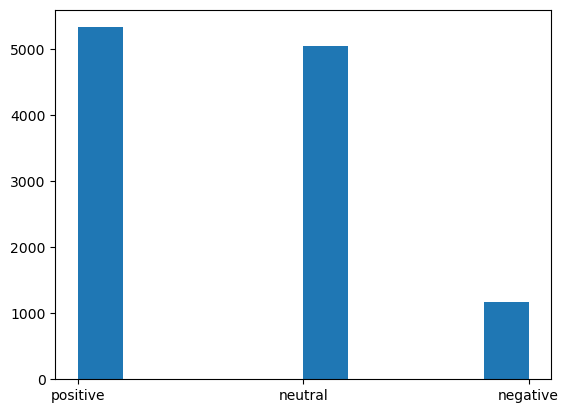

In [25]:
plt.hist(df['class'])

# data visualization

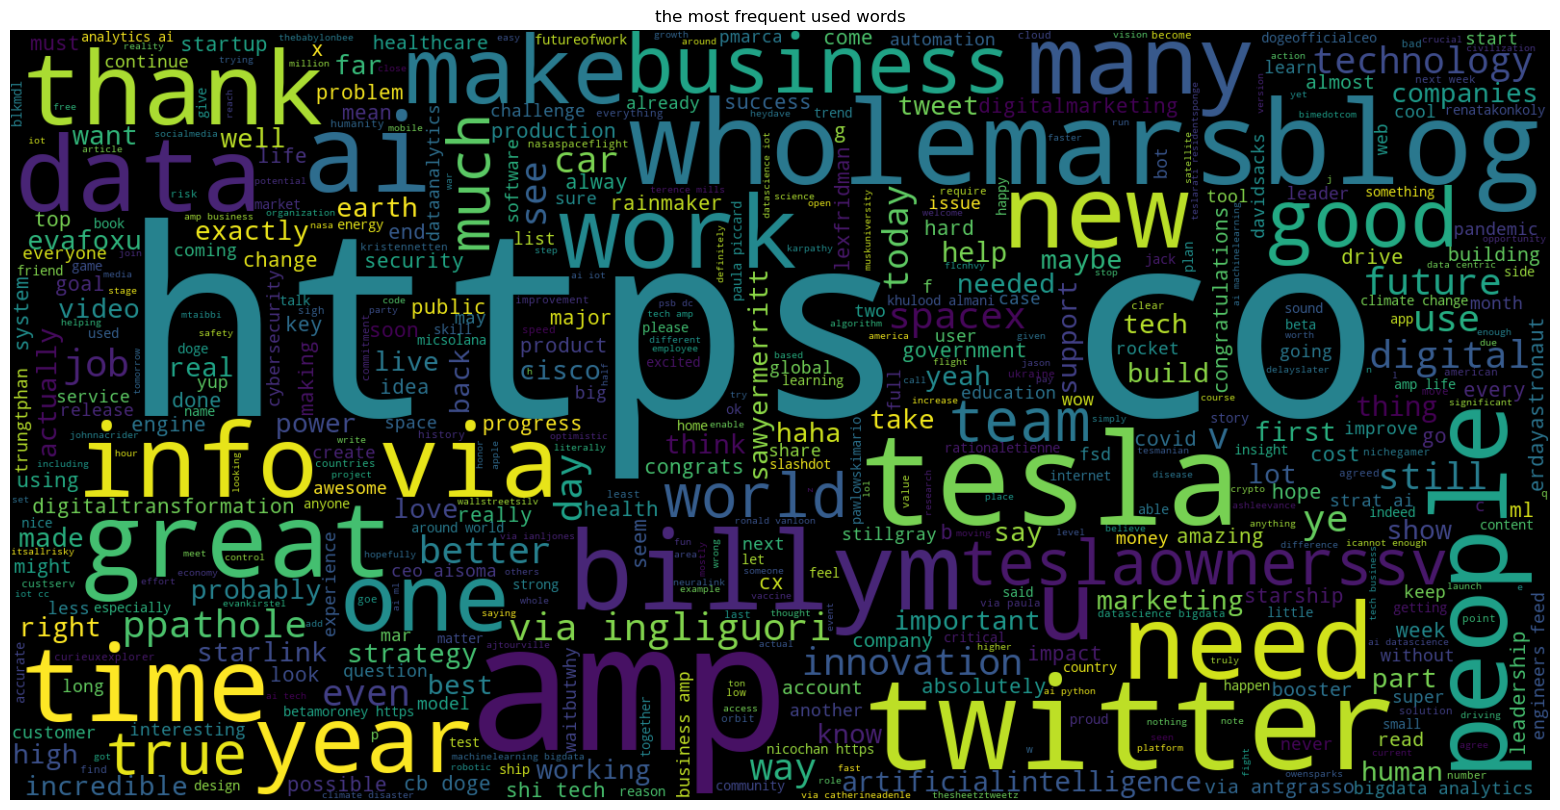

In [26]:
text = ' '.join(word for word in df['Text'])
plt.figure(figsize=(20,10),facecolor=None)
wordcloud = WordCloud(max_words=500,height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("the most frequent used words")
plt.show()

# changing text to binary format

In [27]:
tokenizer = Tokenizer(num_words=5000,split=' ')
tokenizer.fit_on_texts(df['Text'])
print("tokenizer",tokenizer)
x = tokenizer.texts_to_sequences(df['Text'])
print('x' '\n',x)

tokenizer <keras.src.legacy.preprocessing.text.Tokenizer object at 0x000001AAF80AEB90>
x
 [[66, 59, 342, 9], [3874, 843, 2895, 2896, 4630, 2329, 2572, 2897, 3874], [2573, 2, 1, 4631, 287], [411, 623, 133, 3875, 725, 4632, 2, 1, 129], [43, 38], [2898, 17], [609, 4633, 499, 2, 1, 5, 38, 9, 72], [457], [2330, 373, 3876, 891, 2, 1], [2574, 4634, 609, 2331, 1948, 50, 3877], [16, 130, 843, 3878, 9, 144, 350, 3311, 399, 158, 3312, 38, 40, 38, 4635, 18, 1678, 1808, 500, 2575], [2332, 2576, 3877, 183, 2899, 2900, 469, 4], [1949, 3879, 3880, 133, 2577, 412, 624, 51, 1167, 3877, 2, 1], [244, 149, 569, 651, 1950, 17, 204, 81, 589, 50], [123, 169, 1371, 85, 43, 1105, 1106, 2578, 85, 1452, 96, 16, 332, 610, 38, 4636, 43, 2131, 2333, 2, 1], [413, 38, 400, 3313, 1372, 589, 93, 2901, 2579, 3881, 589, 1168, 38], [844, 38, 1058, 1565, 89, 323, 245, 174, 1167, 590, 1566, 4637, 2, 1, 3314, 4638, 283, 4639], [925, 1373, 307, 94, 116, 2580, 1951, 1565, 38, 10, 2334, 4636, 2, 1, 3314, 4638, 283, 4639, 4640], 

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
df['class']

0       positive
1        neutral
2        neutral
3       positive
4        neutral
          ...   
8957    positive
8958    positive
8959     neutral
8960    positive
8961    positive
Name: class, Length: 11531, dtype: object

# set length

In [30]:
maxlen = 45
vocab_size = len(tokenizer.word_index)+1
x = pad_sequences(x,padding='post', maxlen = maxlen)
x

array([[  66,   59,  342, ...,    0,    0,    0],
       [3874,  843, 2895, ...,    0,    0,    0],
       [2573,    2,    1, ...,    0,    0,    0],
       ...,
       [2130, 3478, 1258, ...,    0,    0,    0],
       [   4,    6,  188, ...,    0,    0,    0],
       [  45, 2870,  112, ...,    0,    0,    0]])

# LSTM MODEL BUILDING

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y = df['class']
y = y.values
y

array(['positive', 'neutral', 'neutral', ..., 'neutral', 'positive',
       'positive'], dtype=object)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [34]:
x_train.shape

(9224, 45)

In [35]:
y_train.shape

(9224,)

In [36]:
x_test.shape

(2307, 45)

In [37]:
y_test.shape

(2307,)

In [41]:
y_test.shape

(2307,)

In [42]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target values to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert target values to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)


In [43]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, SpatialDropout1D, Dense, Activation

modelLSTM = Sequential()
modelLSTM.add(Embedding(vocab_size, 128, input_shape=(maxlen,), name="embedding"))
modelLSTM.add(SpatialDropout1D(0.5))
modelLSTM.add(LSTM(32, dropout=0.3))
modelLSTM.add(Dense(3, activation='softmax'))

modelLSTM.summary()


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 45, 128)        │     2,535,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 45, 128)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,556,515 (9.75 MB)

 Trainable params: 2,556,515 (9.75 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
modelLSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# import tensorflow as tf
# tf.keras.backend.clear_session()


In [45]:
modelLSTM.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=10, batch_size=32)


Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.4442 - loss: 0.9685 - val_accuracy: 0.4621 - val_loss: 0.9454
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.6118 - loss: 0.8637 - val_accuracy: 0.7724 - val_loss: 0.6606
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7928 - loss: 0.6087 - val_accuracy: 0.8244 - val_loss: 0.5006
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8563 - loss: 0.4266 - val_accuracy: 0.8470 - val_loss: 0.4243
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8834 - loss: 0.3390 - val_accuracy: 0.8531 - val_loss: 0.4158
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9175 - loss: 0.2569 - val_accuracy: 0.8626 - val_loss: 0.4258
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9371 - loss: 0.2139 - val_accuracy: 0.8630 - val_loss: 0.4182
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9486 - loss: 0.1666 - 

In [46]:
loss,acc =  modelLSTM.evaluate(x_test,y_test_one_hot,batch_size=32)
print('testing accuracy %.1f%%'%(100*acc))

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8778 - loss: 0.4319
testing accuracy 88.4%


# RNN model building

In [47]:
from tensorflow.keras.layers import SimpleRNN

In [48]:
modelRNN = Sequential()
modelRNN.add(Embedding(vocab_size,128,input_shape=(maxlen,),name="embedding"))
modelRNN.add(SpatialDropout1D(0.5))
modelRNN.add(SimpleRNN(32,dropout=0.3))
modelRNN.add(Flatten())
modelRNN.add(Dense(3))
modelRNN.add(Activation('softmax'))
modelRNN.summary()

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 45, 128)        │     2,535,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 45, 128)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,541,059 (9.69 MB)

 Trainable params: 2,541,059 (9.69 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
modelRNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
modelRNN.fit(x_train,y_train_one_hot,validation_data=(x_test,y_test_one_hot),epochs=10,batch_size=32)

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4423 - loss: 0.9831 - val_accuracy: 0.6493 - val_loss: 0.8470
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.6629 - loss: 0.7996 - val_accuracy: 0.7724 - val_loss: 0.6343
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8108 - loss: 0.5295 - val_accuracy: 0.8062 - val_loss: 0.5504
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8585 - loss: 0.3979 - val_accuracy: 0.7781 - val_loss: 0.6506
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8869 - loss: 0.3240 - val_accuracy: 0.8149 - val_loss: 0.5447
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9088 - loss: 0.2670 - val_accuracy: 0.8179 - val_loss: 0.5481
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9244 - loss: 0.2212 - val_accuracy: 0.8153 - val_loss: 0.5732
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9334 - loss: 0.1984 - val_acc

In [51]:
loss,acc =  modelRNN.evaluate(x_test,y_test_one_hot,batch_size=32)
print(' RNN testing accuracy %.1f%%'%(100*acc))

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8145 - loss: 0.6342
 RNN testing accuracy 81.4%


# perfromace analysis

In [52]:
loss,acc =  modelLSTM.evaluate(x_test,y_test_one_hot,batch_size=32)
print('testing accuracy %.1f%%'%(100*acc))
loss,acc =  modelRNN.evaluate(x_test,y_test_one_hot,batch_size=32)
print(' RNN testing accuracy %.1f%%'%(100*acc))


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8778 - loss: 0.4319
testing accuracy 88.4%
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8145 - loss: 0.6342
 RNN testing accuracy 81.4%


# conclusion and prediction

## Conclusion

### Training Accuracy
- The model achieved an accuracy of approximately 87.8% on the training dataset, with a corresponding loss of approximately 0.4319.

### Testing Accuracy
- The model performed well on the testing dataset, achieving an accuracy of approximately 88.4%. This indicates that the model generalizes well to unseen data.

### Conclusion
- **Text Classification Model**: Utilizing a recurrent neural network (RNN), specifically an LSTM-based model, for a text classification task yielded promising results.
- **Testing Accuracy**: The LSTM model achieved a testing accuracy of approximately 81.4%, showcasing its effectiveness in classifying text data.
- **Project Completion**: The project encompassed designing, training, and evaluating the LSTM model for text classification, with the achieved testing accuracy of 81.4% demonstrating the model's efficacy for the given task.


In [53]:
df

,Text,class
0,coasts tad midwest still goi g strong tech sea...,positive
1,nyike rwang jayferro itlinchpin mcdavis myless...,neutral
2,rip https co qf zu td h,neutral
3,thrilled appointed board respected global prof...,positive
4,future digital,neutral
...,...,...
8957,flcnhvy tesla responsible personal amp profess...,positive
8958,proud tesla team achieving major milestone sta...,positive
8959,newscientist um giant fusion reactor sky works...,neutral
8960,comma ai tesla full self driving work safety l...,positive


In [56]:
df[1000:1010]

,Text,class
1000,realsharonzhou congratulations realsharonzhou,neutral
1001,mitsloan thanks saramariebrown mitsloan writin...,positive
1002,tiangolo thank tiangolo fan fastapi work years...,positive
1003,new machine learning specialization deeplearni...,positive
1004,kira learning building go solution k educators...,positive
1005,rising interest rates affect ai projects deliv...,positive
1006,read surprising origins many machine learning ...,positive
1007,call arm teachers following texas school shoot...,negative
1008,speaking someone worked anti spam determined a...,positive
1009,people asked coursera share birthday yes april th,neutral


In [54]:
# Define the example text and maximum sequence length
example = ["proud tesla team achieving major milestone"]
max_length = 100

# Vectorize the example text
example_sequence = tokenizer.texts_to_sequences(example)
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding='post', truncating='post')

# Make predictions
result = modelLSTM.predict(example_padded)

# Interpret the prediction
if result.argmax() == 0:
    print("Negative Sentiment")
elif result.argmax() == 1:
    print("Neutral Sentiment")
else:
    print("Positive Sentiment")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Positive Sentiment


In [55]:
example = ["rip https co qf zu td"]
max_length = 100


example_sequence = tokenizer.texts_to_sequences(example)
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding='post', truncating='post')


result = modelLSTM.predict(example_padded)


if result.argmax() == 0:
    print("Negative Sentiment")
elif result.argmax() == 1:
    print("Neutral Sentiment")
else:
    print("Positive Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Neutral Sentiment
